In [1]:
cd /content/drive/MyDrive/ColabNotebooks/ML/natural_gas_forecasting

/content/drive/MyDrive/ColabNotebooks/ML/natural_gas_forecasting


In [2]:
!pip install -q gluonts

     |████████████████████████████████| 2.8 MB 8.2 MB/s 
     |████████████████████████████████| 11.1 MB 39.6 MB/s 


In [3]:
import pandas as pd

In [4]:
train = pd.read_csv("T1.csv")
# extract the data corresponding to Bitcoin (Asset_ID = 1)
train["Date/Time"]  = pd.to_datetime(train['Date/Time'])
train = train.set_index("Date/Time")


indexer_9am = train.index.indexer_at_time('9:00:00')
values_at_9am = train.iloc[indexer_9am]
# high_values_at_9am = values_at_9am[["High"]]

# take a look
train

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500


In [5]:
freq = "1D"             # the frequency of our data
context_length    = 180 # train on this number of days
prediction_length =  90 # predict these many days, these are removed from the end of the training data

In [6]:
from gluonts.dataset.common import ListDataset

train_ds = ListDataset(
    [{'start': "2018-01-01 00:00:00", 'target': train.iloc[:-prediction_length, 1]}],
    freq=freq
)
# test dataset: use the whole dataset, add "target" and "start" fields
test_ds = ListDataset(
    [{'start': "2018-01-01 00:00:00", 'target': train.iloc[:, 1]}],
    freq=freq
)


/usr/local/lib/python3.7/dist-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [7]:
list(train_ds)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq


[{'source': SourceContext(source='list_data', row=0),
  'start': Timestamp('2018-01-01 00:00:00', freq='D'),
  'target': array([5.311336 , 5.672167 , 5.216037 , ..., 1.336794 , 0.6058227,
         1.634241 ], dtype=float32)}]

In [8]:
for i in range(len(train)):
    temp = train.iloc[i, 1]
    if f"{temp:.7f}" == "0.6058227":
        print(train.iloc[i-5:i+1])

                     LV ActivePower (kW)  Wind Speed (m/s)  \
Date/Time                                                    
2018-12-31 07:50:00                  0.0          1.310927   
2018-12-31 08:00:00                  0.0          1.110848   
2018-12-31 08:10:00                  0.0          1.065520   
2018-12-31 08:20:00                  0.0          1.400224   
2018-12-31 08:30:00                  0.0          1.336794   
2018-12-31 08:40:00                  0.0          0.605823   

                     Theoretical_Power_Curve (KWh)  Wind Direction (°)  
Date/Time                                                               
2018-12-31 07:50:00                            0.0           39.670631  
2018-12-31 08:00:00                            0.0          104.625099  
2018-12-31 08:10:00                            0.0          126.673599  
2018-12-31 08:20:00                            0.0          139.335998  
2018-12-31 08:30:00                            0.0          145.6

In [9]:
train.tail(95)

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-12-31 08:10:00,0.000000,1.065520,0.000000,126.673599
2018-12-31 08:20:00,0.000000,1.400224,0.000000,139.335998
2018-12-31 08:30:00,0.000000,1.336794,0.000000,145.681305
2018-12-31 08:40:00,0.000000,0.605823,0.000000,129.385803
2018-12-31 08:50:00,0.000000,1.634241,0.000000,6.104557
...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500


In [10]:
! pip install --upgrade mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 2.2 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [11]:
from gluonts.model.simple_feedforward  import SimpleFeedForwardEstimator
# to use the DeepAREstimator 
# from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.distribution.student_t import StudentTOutput
from gluonts.mx import Trainer

estimator = SimpleFeedForwardEstimator(num_hidden_dimensions=[50],
                                       freq=freq,
                                       context_length=context_length,
                                       prediction_length=prediction_length,
                                       distr_output=StudentTOutput(),
                                       trainer=Trainer(epochs=50,
                                                       learning_rate=1e-3,
                                                       num_batches_per_epoch=100,
                                                       patience=10))

predictor = estimator.train(train_ds)
print("Done")

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
100%|██████████| 100/100 [00:03<00:00, 27.02it/s, epoch=50/50, avg_epoch_loss=2.56]

Done


In [12]:
from gluonts.evaluation import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=train_ds,  # dataset
    predictor=predictor,  # predictor
    num_samples=2000,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)

/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)


In [13]:
# first entry of the forecast list
forecast_entry = forecasts[0]
print(f"Mean of the future window:\n {forecast_entry.mean}")
print(f"0.5-quantile (median) of the future window:\n {forecast_entry.quantile(0.5)}")

Mean of the future window:
 [3.7726943 3.7950332 3.92491   3.8969307 3.9432645 4.0502963 3.861479
 4.1321797 4.3118124 4.149659  4.1489697 4.387105  4.495737  4.649682
 4.911335  4.8551655 4.6613812 4.8546233 4.8424234 4.8725195 4.74959
 4.836722  4.834972  4.7967105 4.9139037 4.8432345 4.7610693 4.812507
 4.809838  4.6715193 4.5341353 4.5255632 4.3467593 4.367712  4.530293
 4.487893  4.2677813 4.0321226 3.9734633 4.1529737 3.9975507 4.0022955
 3.966183  4.007051  3.9380548 3.9626985 3.8107464 3.7310214 3.8249552
 3.418249  3.365215  3.2841997 3.5309894 3.1276422 3.3095655 3.277562
 3.2150025 3.1234758 3.2946901 3.3674495 3.0710104 3.2262778 2.9866767
 2.997512  3.134271  3.1966844 3.211039  3.112917  3.1175888 3.2705326
 3.2035348 3.3714643 3.3454156 3.4130309 3.1631806 3.0473483 3.059411
 3.1027935 3.1004608 3.0772007 3.2658818 3.2389836 3.1854012 2.9737508
 3.2974658 3.1720207 2.998345  2.983739  3.0426772 3.1106865]
0.5-quantile (median) of the future window:
 [3.7697747 3.787926  

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

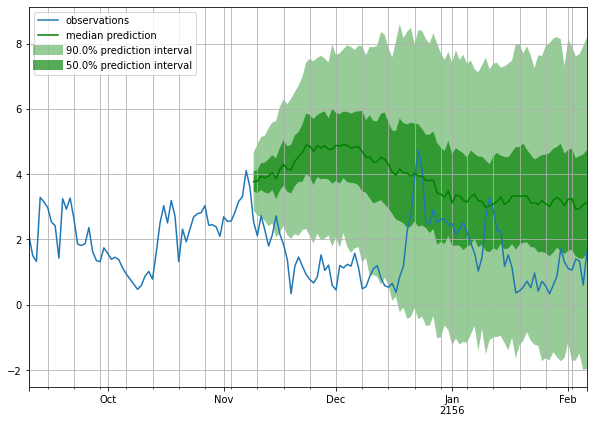

In [15]:
plot_prob_forecasts(tss[0], forecasts[0])

In [16]:
plot_prob_forecasts(tss[0], forecasts[0].mean))

SyntaxError: ignored

In [ ]:
plot_prob_forecasts(tss[0], forecasts[0].quantile(0.5))